In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Распределения случайных величин

https://www.essycode.com/distribution-viewer/

## Нормальное (гауссово) распределение
Параметры: $\mu$ - математическое ожидание, $\sigma$ - стандартное отклонение
$$
N(x,\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

$$
N(x,0,1) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$

https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

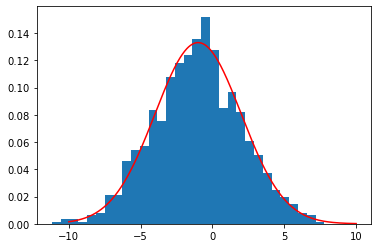

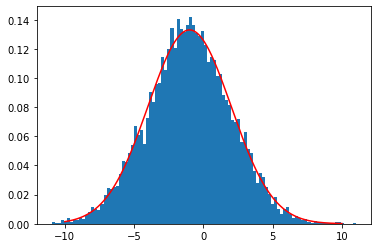

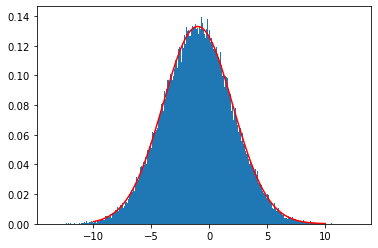

In [3]:
def normal_distribution(x,mu=0,sigma=1):
    return 1/(sigma*np.sqrt(2 * np.pi))* np.exp(-1/2*((x-mu)/sigma)**2)

X = np.linspace(-10,10,num=500)
mu = -1
sigma = 3

sample_size = [1000, 10000, 100000]

for n in sample_size:
    Z = np.random.normal(mu,sigma,n)
    plt.figure()
    plt.hist(Z,density=True, bins=int(n**0.5));
    plt.plot(X,normal_distribution(X,mu,sigma),color='r')

## Задание 1 
Смоделируйте __Центральную предельную теорему__.

https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0

https://seeing-theory.brown.edu/probability-distributions/index.html

Другими словами, Вам необходимо написать код, в котором из любой (для простоты дискретной) случайной величины $\xi$ получает нормальное распределение с параметрами $\mu=0$ и $\sigma=1$.

Вы можете пользоваться функцией __np.random.choice(A, size = n, p=P)__.

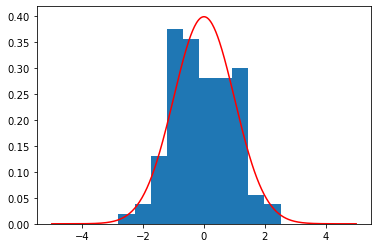

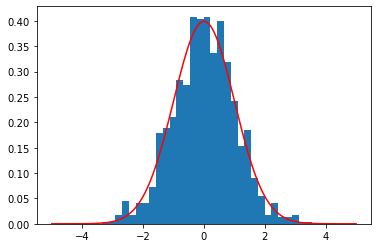

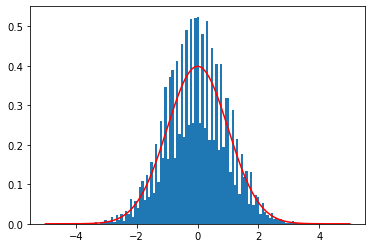

In [7]:
def my_normal(A,P, m=1000):
    '''
    A - значения случайной величины
    P - вероятности случайной величины
    m - Количество раз создания S_n для формирования итоговой выборки
    '''

    mu = A.dot(P)
    sigma = (((A - mu)**2).dot(P))**0.5 # Считаем среднеквадратичное отклонение по математичекой формуле

    n = 1000 # Количество слагаемых в сумме S_n = x_1 + ... + x_n

    Z = np.empty(m) # Выборка из значений S_n
    for i in range(m):
        s_n = sum(np.random.choice(A, size=n, p=P)) # Тут Ваш код.
        Z[i] = (s_n - mu * n)/(sigma * n ** 0.5)

    N = Z # Тут надо преобразовать Z в N при помощи mu, sigma и n.
    
    return N

A = np.array([1, 2, 3]) # значения с.в. x_i
P = np.array([0.1, 0.5, 0.4]) # вероятности с.в. x_i
sample_size = [100, 1000, 10000]

X = np.linspace(-5,5,num=500)

for m in sample_size:
    Z = my_normal(A,P,m)
    plt.figure()
    plt.hist(Z,density=True, bins=int(m**0.5));
    plt.plot(X,normal_distribution(X,0,1),color='r')

## Экспоненциальное распределение
Параметр: $\lambda$ - интенсивность посетителей в единицу времени
$$
p(x, \lambda) = 
 \begin{cases}
   \lambda e^{-\lambda x} \ & x \geq 0\\
   0 & x < 0\\
 \end{cases}
$$

Математическое ожидание $E(\xi) = \frac{1}{\lambda}$

Стандартное отклонение $\sigma(\xi) = \frac{1}{\lambda}$

https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5


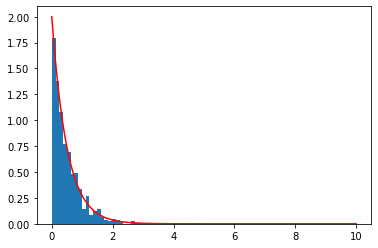

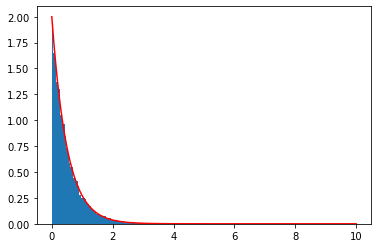

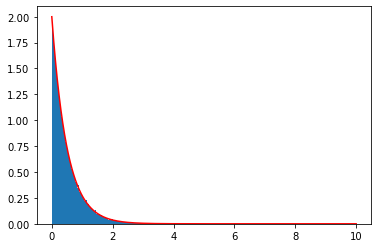

In [9]:
def exponential_distribution(X, lambd):
    return lambd*np.exp(-lambd*X)

X = np.linspace(0,10,num=500)
lambd=2

sample_size = [1000, 10000, 100000]

for n in sample_size:
    Z = np.random.exponential(1/lambd, n)
    plt.figure()
    plt.hist(Z,density=True, bins=int(n**0.5));
    plt.plot(X,exponential_distribution(X,lambd),color='r')

## Задание 2
Смоделируйте экспоненциальную случайную величину. Запрограммируйте функцию __my_exponential(lambd,n)__, в которой __n__ - количество моделируемых интервалов времени и __lambd__ среднее количество посетителей в один интервал времени.

Каждый интервал времени состоит из __m__ моментов (tick).

Создайте массив __Ticks__ размера __n*m__, такой, чтобы в каждй момент времени было указано зашел ли в этот момент времени посетитель. Все __lambd*n__ посетителей должны быть равновероятно случайным образом распределены по всему массиву __Ticks__. 

Для этого Вы можете сделать массив __Ticks__ размеры __n*m__ вида 

__111..11100000...00000__,

где число единиц равно __lambd*n__, а потом перемешать его элементы, воспользовавшись функцией  __np.random.shuffle(Ticks)__

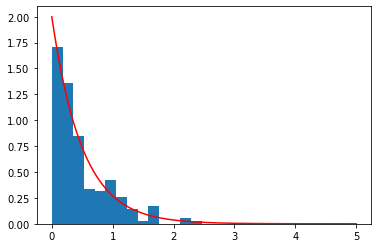

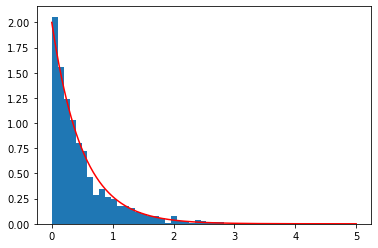

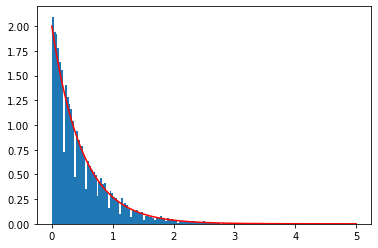

In [11]:
def my_exponential(lambd,n):
    m = 60
    ticks_count = n*m
    Ticks = np.zeros(ticks_count) # Тут Ваш код
    Ticks[:lambd * n] = [1] * (lambd * n)
    np.random.shuffle(Ticks)
    
    
    Z = []
    prev_true=-1
    for i in range(ticks_count):
        if Ticks[i]:
            Z.append(i - prev_true-1) # Тут Ваш код
            prev_true = i

    return np.array(Z) / m



sample_size = [100, 1000, 10000]
lambd = 2

X = np.linspace(0,5,num=500)

for m in sample_size:
    Z = my_exponential(lambd,m)
    plt.figure()
    plt.hist(Z,density=True, bins=int(len(Z)**0.5));
    plt.plot(X,exponential_distribution(X,lambd),color='r')